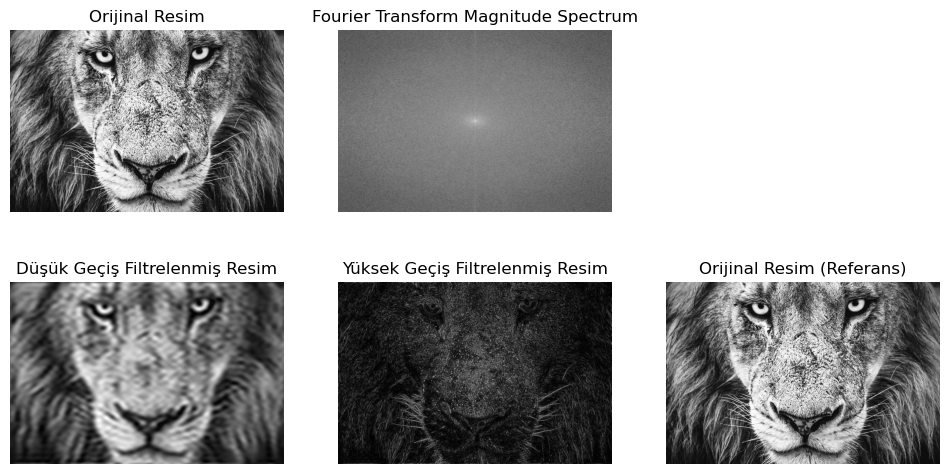

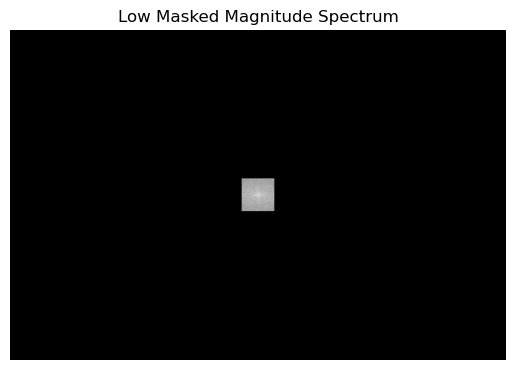

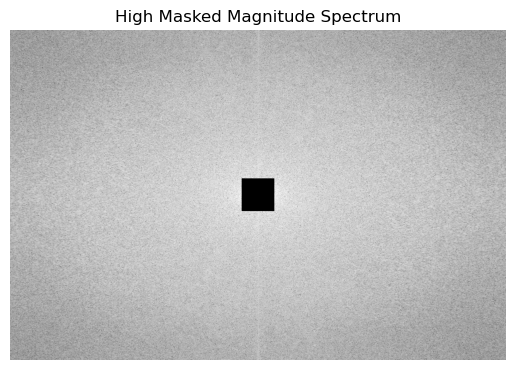

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# 1. Grayscale resmi yükleme
img = cv2.imread(os.path.join('animal-big-black-and-white-carnivore.jpg'), cv2.IMREAD_GRAYSCALE)

# Resmi göster
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Orijinal Resim')
plt.axis('off')
plt.show()

# 2. Fourier transformunu uygulama
f_transform = np.fft.fft2(img)
f_transform_shifted = np.fft.fftshift(f_transform)

# Magnitüd spektrumunu hesaplayın ve gösterme
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform Magnitude Spectrum')
plt.axis('off')
plt.show()

# 3. Düşük geçiş ve yüksek geçiş filtrelerini oluşturma
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2

# Düşük geçiş filtresi
low_pass_mask = np.zeros((rows, cols), np.uint8)
size = 30
low_pass_mask[crow - size:crow + size, ccol - size:ccol + size] = 1

# Yüksek geçiş filtresi
high_pass_mask = np.ones((rows, cols), np.uint8)
high_pass_mask[crow - size:crow + size, ccol - size:ccol + size] = 0

# 4. Filtreleri uygulayın ve görüntüleri yeniden oluşturma

# Düşük geçiş filtresini uygulayın
f_transform_shifted_low = f_transform_shifted * low_pass_mask
f_ishift_low = np.fft.ifftshift(f_transform_shifted_low)
img_reconstructed_low = np.fft.ifft2(f_ishift_low)
img_reconstructed_low = np.abs(img_reconstructed_low)

low_magnitude_spectrum_filtered =  np.log(np.abs(f_transform_shifted_low) + 1)


# Yüksek geçiş filtresini uygulama
f_transform_shifted_high = f_transform_shifted * high_pass_mask
f_ishift_high = np.fft.ifftshift(f_transform_shifted_high)
img_reconstructed_high = np.fft.ifft2(f_ishift_high)
img_reconstructed_high = np.abs(img_reconstructed_high)

high_magnitude_spectrum_filtered =  np.log(np.abs(f_transform_shifted_high) + 1)

# 5. Sonuçları görselleştirme
plt.imshow(img_reconstructed_low, cmap='gray')
plt.title('Düşük Geçiş Filtrelenmiş Resim')
plt.axis('off')
plt.show()

plt.imshow(img_reconstructed_high, cmap='gray')
plt.title('Yüksek Geçiş Filtrelenmiş Resim')
plt.axis('off')
plt.show()

plt.imshow(low_magnitude_spectrum_filtered, cmap='gray')
plt.title('Low Masked Magnitude Spectrum')
plt.axis('off')
plt.show()

plt.imshow(high_magnitude_spectrum_filtered, cmap='gray')
plt.title('High Masked Magnitude Spectrum')
plt.axis('off')
plt.show()
